In [ ]:
#default_exp lstm

In [ ]:
#export
from nbdev.showdoc import show_doc
from ModernArchitecturesFromPyTorch.nb_ScratchToPytorch import *
from ModernArchitecturesFromScratch.convolutions_pooling_04 import *

# LSTM
> Implementing an LSTM. An extension of RNNs that have better long term dependency handling through the introduction of a cell state controlled by forget, update, input and output states.
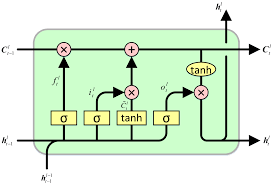

In [ ]:
#export
class LSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        "LSTM Module"
        super().__init__()
        self.x_forget_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_forget_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.forget_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_scale_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_scale_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.scale_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_add_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_add_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.add_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_hidden_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_hidden_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.hidden_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.tanh = nn.Tanh()
        self.sig = nn.Sigmoid()
        self.hidden_sz = hidden_sz
    
    def forward(self, inputs, states=None):
        hidden, cs = torch.zeros(self.hidden_sz) if states is None else states, torch.zeros(self.hidden_sz) if states is None else states
        bs, fs, _ = inputs.shape
        hiddens = []

        for feat in range(fs):
            inp = inputs[:,feat,:]

            forget = self.sig(inp @ self.x_forget_weight + hidden @ self.h_forget_weight + self.forget_bias)
            addition_scale = self.sig(inp @ self.x_scale_weight + hidden @ self.h_scale_weight + self.scale_bias)
            addition_base = self.tanh(inp @ self.x_add_weight + hidden @ self.h_add_weight + self.add_bias)

            cs = cs * forget + addition_base * addition_scale
            hidden = self.sig(inp @ self.x_hidden_weight + hidden @ self.h_hidden_weight + self.hidden_bias) + self.tanh(cs)

            hiddens.append(hidden.unsqueeze(1))
        
        hiddens = torch.cat(hiddens, dim=1)

        return hiddens

```python
class LSTM(nn.Module):
    def __init__(self, input_sz, hidden_sz):
        "LSTM Module"
        super().__init__()
        self.x_forget_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_forget_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.forget_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_scale_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_scale_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.scale_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_add_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_add_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.add_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.x_hidden_weight = nn.Parameter(get_weight(input_sz, hidden_sz))
        self.h_hidden_weight = nn.Parameter(get_weight(hidden_sz, hidden_sz))
        self.hidden_bias = nn.Parameter(torch.zeros(hidden_sz))

        self.tanh = nn.Tanh()
        self.sig = nn.Sigmoid()
        self.hidden_sz = hidden_sz
    
    def forward(self, inputs, states=None):
        hidden, cs = torch.zeros(self.hidden_sz) if states is None else states, torch.zeros(self.hidden_sz) if states is None else states
        bs, fs, _ = inputs.shape
        hiddens = []

        for feat in range(fs):
            inp = inputs[:,feat,:]

            forget = self.sig(inp @ self.x_forget_weight + hidden @ self.h_forget_weight + self.forget_bias)
            addition_scale = self.sig(inp @ self.x_scale_weight + hidden @ self.h_scale_weight + self.scale_bias)
            addition_base = self.tanh(inp @ self.x_add_weight + hidden @ self.h_add_weight + self.add_bias)

            cs = cs * forget + addition_base * addition_scale
            hidden = self.sig(inp @ self.x_hidden_weight + hidden @ self.h_hidden_weight + self.hidden_bias) + self.tanh(cs)

            hiddens.append(hidden.unsqueeze(1))
        
        hiddens = torch.cat(hiddens, dim=1)

        return hiddens
```

In [ ]:
lstm = LSTM(16, 10)

In [ ]:
lstm(torch.randn(8,32,16)).shape

torch.Size([8, 32, 10])

In [ ]:
!python notebook2script.py LSTM.ipynb

Converted LSTM.ipynb to ModernArchitecturesFromPyTorch/nb_LSTM.py
